# EDA(Exploratury Data Analysis)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import statistics
import numpy as np
import seaborn
import warnings
from scipy import stats
import random
warnings.filterwarnings("ignore")

将数据读入内存，并打印数据集的大小以及前5行数据

In [2]:
data = pd.read_csv('../data/2015_trip_data.csv')
print(len(data))
data.head()

142846


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0


确定数据集的时间范围

In [3]:
data = data.sort_values(by='starttime')
# For DataFrame with multi-level index, return new DataFrame with labeling information in the columns under the index names, defaulting to ‘level_0’, ‘level_1’, etc.
data.reset_index()
print('Data range of dataset: %s - %s' % (data['starttime'].iloc[0], data['stoptime'].iloc[len(data)-1]))

Data range of dataset: 1/1/2015 0:24 - 9/9/2015 9:59


绘制用户类型分布图

usertype
Annual Member             87360
Short-Term Pass Holder    55486
dtype: int64


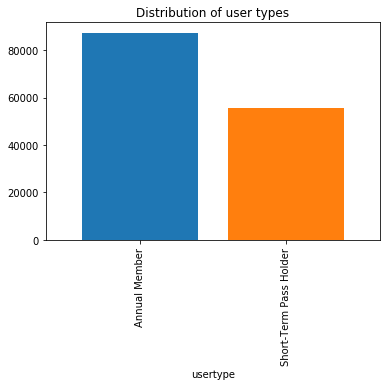

In [4]:
groupby_user = data.groupby('usertype').size()
print(groupby_user)
groupby_user.plot.bar(title='Distribution of user types', width=0.8)

绘制性别分布图

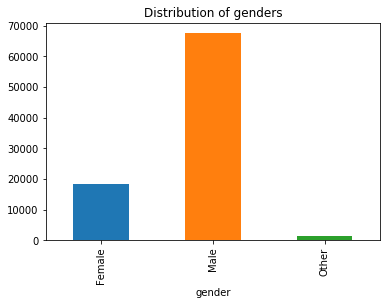

In [5]:
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title='Distribution of genders')

绘制出生年份分布图

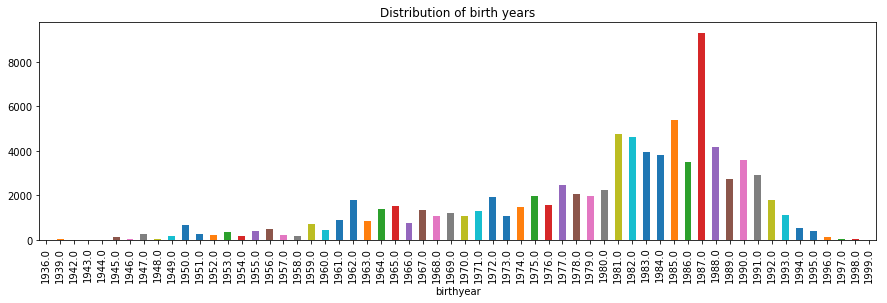

In [6]:
data = data.sort_values(by='birthyear')
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title='Distribution of birth years', figsize=(15, 4))

绘制千禧一代中会员的频率分布图

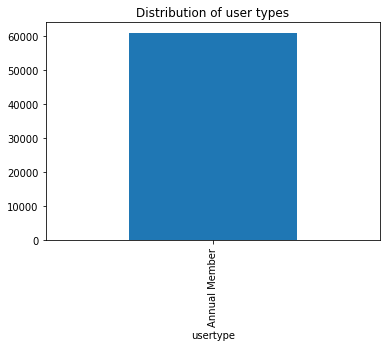

In [7]:
data_mil = data[(data['birthyear']>=1977) & (data['birthyear']<=1994)]
groupby_mil = data_mil.groupby('usertype').size()
groupby_mil.plot.bar(title='Distribution of user types')

根据性别绘制出生年份分布图

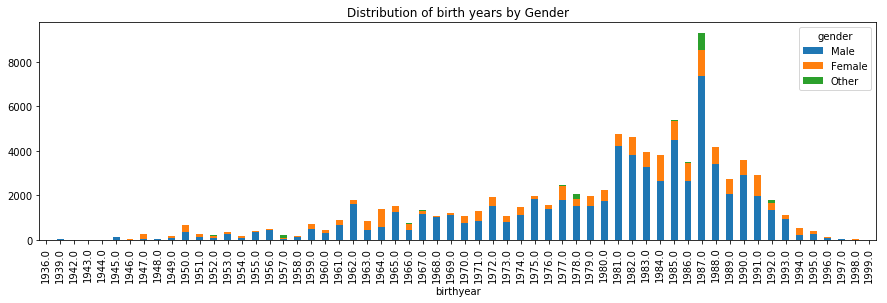

In [8]:
# unstack: 将gender列按照其内容展开，若为空则以0填充，类似于LabelEncoder
groupby_birthyear_gender = data.groupby(['birthyear', 'gender'])['birthyear'].count().unstack('gender').fillna(0)
groupby_birthyear_gender[['Male', 'Female', 'Other']].plot.bar(title='Distribution of birth years by Gender', stacked=True, figsize=(15, 4))

根据用户类型绘制出生年份分布图

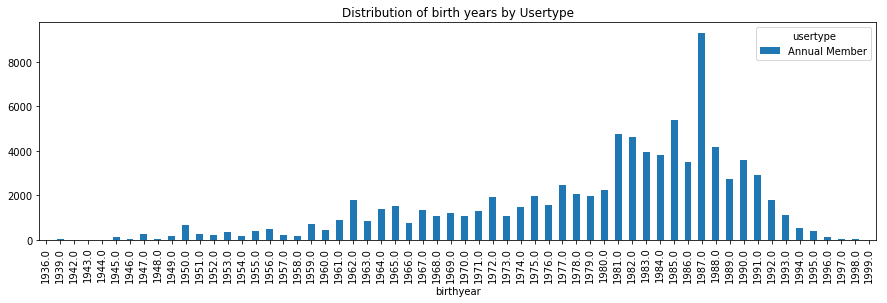

In [9]:
groupby_birthyear_gender = data.groupby(['birthyear', 'usertype'])['birthyear'].count().unstack('usertype').fillna(0)
groupby_birthyear_gender[['Annual Member']].plot.bar(title='Distribution of birth years by Usertype', stacked=True, figsize=(15, 4))

验证有没有为短期通行证持有者提供出生年份

In [10]:
data[data['usertype']=='Short-Term Pass Holder']['birthyear'].isnull().values.all()

True

验证有没有为短期通行证持有者提供性别

In [11]:
data[data['usertype']=='Short-Term Pass Holder']['gender'].isnull().values.all()

True

将字符串转换为日期时间格式，并获得新的特征

In [12]:
list_ = list(data['starttime'])
list_ = [datetime.datetime.strptime(x, '%m/%d/%Y %H:%M') for x in list_]
data['starttime_mod'] = pd.Series(list_, index=data.index)
data['starttime_date'] = pd.Series([x.date() for x in list_], index=data.index)
data['starttime_year'] = pd.Series([x.year for x in list_], index=data.index)
data['starttime_month'] = pd.Series([x.month for x in list_], index=data.index)
data['starttime_day'] = pd.Series([x.day for x in list_], index=data.index)
data['starttime_hour'] = pd.Series([x.hour for x in list_], index=data.index)

绘制每天的行程持续时间分布图

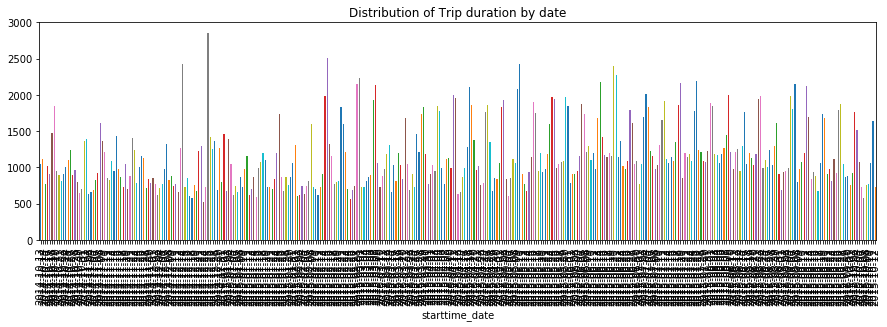

In [13]:
data.groupby('starttime_date')['tripduration'].mean().plot.bar(title='Distribution of Trip duration by date', figsize=(15, 4))

使用统计软件包确定测度中心

In [14]:
trip_duration = list(data['tripduration'])
station_from = list(data['from_station_name'])
print('Mean of trip duration: %f' % statistics.mean(trip_duration))
print('Median of trip duration: %f' % statistics.median(trip_duration))
print('Mode of station originating from: %s' % statistics.mode(station_from)) # 众数

Mean of trip duration: 1210.937242
Median of trip duration: 646.159000
Mode of station originating from: Pier 69 / Alaskan Way & Clay St


绘制行程持续时间直方图

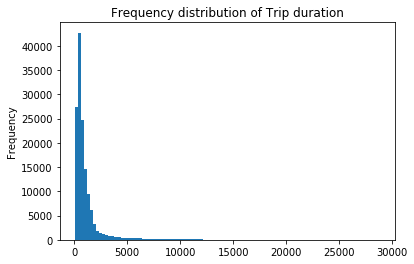

In [15]:
# bins这个参数指定bin(箱子)的个数,也就是总共有几条条状图
data['tripduration'].plot.hist(bins=100, title='Frequency distribution of Trip duration')
plt.show()

绘制行程持续时间的箱形图

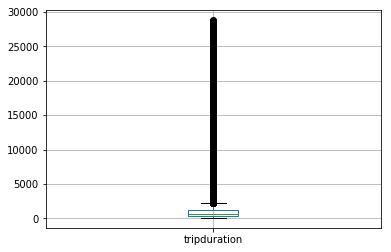

In [16]:
box = data.boxplot(column=['tripduration'])
plt.show()

确定行程持续时间离群值与观察值的比例

In [17]:
# 小于这个值的观察值占总数q的百分比，参数分别为: a 输入数组，q 要计算的百分位数，在 0~100 之间，axis 沿着它计算百分位数的轴，二维取值0，1
q75, q25 = np.percentile(trip_duration, [75, 25])
iqr = q75 - q25
percent = (len(data) - len([x for x in trip_duration if q75+(1.5*iqr) >= x >= q25-(1.5*iqr)]))*100/float(len(data))
print('Proportion of values as outlier: %f percent' % (percent))

Proportion of values as outlier: 9.177016 percent


计算行程持续时间内观察值的z-分数

In [18]:
mean_trip_duration = np.mean([x for x in trip_duration if q75+(1.5*iqr) >= x >= q25-(1.5*iqr)])
upper_whisker = q75+(1.5*iqr)
print('Mean of trip duration: %f' % (mean_trip_duration))

Mean of trip duration: 724.883361


计算行程持续时间内观察值的平均数

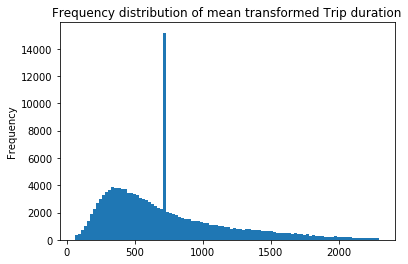

In [19]:
def transform_tripduration(x):
    if x > upper_whisker:
        return mean_trip_duration
    return x
data['tripduration_mean'] = data['tripduration'].apply(lambda x: transform_tripduration(x))
data['tripduration_mean'].plot.hist(bins=100, title='Frequency distribution of mean transformed Trip duration')
plt.show()

在没有离群值的情形下计算测度中心

In [20]:
print('Mean of trip duration: %f' % (data['tripduration_mean'].mean()))
print('Standard deviation of trip duration: %f' % (data['tripduration_mean'].std()))
print('Median of trip duration: %f' % (data['tripduration_mean'].median()))

Mean of trip duration: 724.883361
Standard deviation of trip duration: 440.712850
Median of trip duration: 646.159000


行程持续时间和年龄的散点图

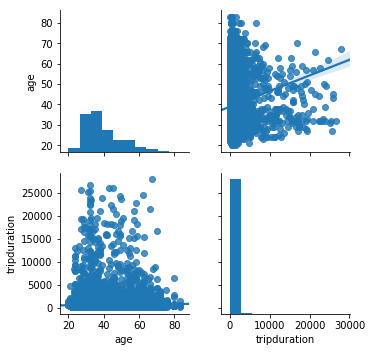

In [21]:
data = data.dropna()
now = list(2019 * np.ones(len(data)))
data['now'] = now
data['age'] = data['now'] - data['birthyear']
data.drop('now',axis=1, inplace=True)
# vars: 只留几个特征两两比较, kind: 给非单变量图增加线性画图样式
seaborn.pairplot(data, vars=['age', 'tripduration'], kind='reg')
plt.show()

行程持续时间和年龄的相关系数

In [22]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = data[['tripduration', 'age']].corr(method='pearson')
print(correlations)

              tripduration    age
tripduration         1.000  0.058
age                  0.058  1.000


计算性别和用户类型的双尾t检验

In [23]:
for cat in ['gender', 'usertype']:
    print('Category: %s\n' % (cat))
    groupby_category = data.groupby(['starttime_date', cat])['starttime_date'].count().unstack(cat)
    groupby_category = groupby_category.dropna()
    category_names = list(groupby_category.columns)
    for comb in [(category_names[i], category_names[j]) for i in range(len(category_names)) for j in range(i+1, len(category_names))]:
        print('%s %s' % (comb[0], comb[1]))
        # Calculates the T-test for the means of TWO INDEPENDENT samples of scores.
        t_statistics = stats.mstats.ttest_ind(list(groupby_category[comb[0]]), list(groupby_category[comb[1]]))
        print('Statistic: %f, P value: %f\n' % (t_statistics.statistic, t_statistics.pvalue))

Category: gender

Female Male
Statistic: -30.351548, P value: 0.000000

Female Other
Statistic: 37.992048, P value: 0.000000

Male Other
Statistic: 42.221381, P value: 0.000000

Category: usertype



在行程数据集上验证中心极限定理

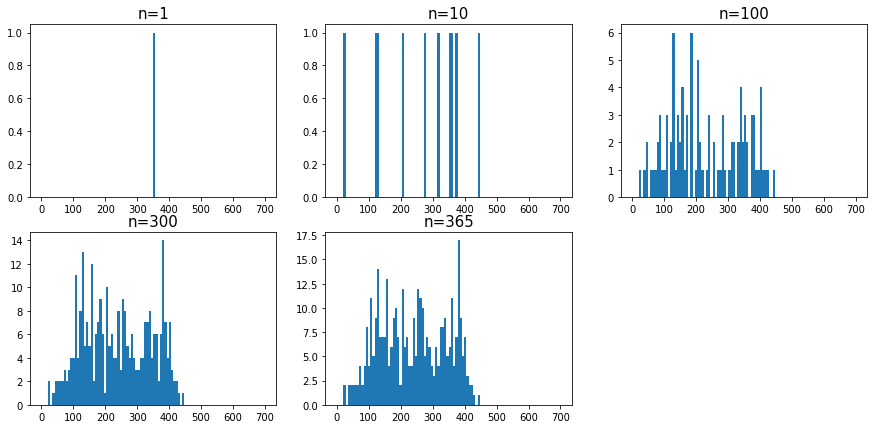

In [24]:
daily_tickets = list(data.groupby('starttime_date').size())
sample_tickets = []
checkpoints = [1, 10, 100, 300, 500, 1000]
plot_count = 1
random.shuffle(daily_tickets)
plt.figure(figsize=(15, 7))
binrange = np.array(np.linspace(0, 700, 101))
for i in range(1000):
    if daily_tickets:
        sample_tickets.append(daily_tickets.pop())
    if i+1 in checkpoints or not daily_tickets:
        plt.subplot(2, 3, plot_count)
        plt.hist(sample_tickets, binrange)
        plt.title('n=%d' % (i+1), fontsize=15)
        plot_count += 1
    if not daily_tickets:
        break
plt.show()